# Used car sales machine learning

## Load in data

In [1]:
##Load in cleaned data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cars = pd.read_csv('cleaned_cars.csv', nrows=5000)

print("Number of features: " +str(len(cars.columns)))
print("Number of rows: "+str(len(cars)))
print("\n")                

Number of features: 544
Number of rows: 5000




## Split data into train and test sets

In [2]:
cars = cars.sample(frac=1, random_state=42)
#train, validation, test = np.split(cars,  [int(.6*len(cars)), int(.8*len(cars))])

trainX = cars.drop(['price'], axis=1)
trainY = cars['price']

## Train many quick and dirty models

In [13]:
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
from sklearn.metrics import mean_squared_error

def crossVal(model, X, Y, cv=10):
    Xtemp = X
    Ytemp = Y
    dataX = []
    dataY = []
    fittedList = []
    mseList = []
    
    #split into CV mini datsets
    for i in range(0, cv):
        Xsam = Xtemp.sample(int(len(Xtemp)/(cv-i)))
        Ysam = Ytemp.loc[Xsam.index]
        dataX.append(Xsam)
        dataY.append(Ysam)
        Xtemp = Xtemp.drop(Xsam.index)
        Ytemp = Ytemp.drop(Ysam.index)
    
    #cross val with CV models
    for i in range(0, cv):
        trainX = pd.concat(dataX[:i] + dataX[i+1:], axis=0)
        trainY = pd.concat(dataY[:i] + dataY[i+1:], axis=0)
        testX = dataX[i]
        testY = dataY[i]
        fitModel = model.fit(trainX, trainY)
        fittedList.append(fitModel)
        testPredict = fitModel.predict(testX)
        mse = mean_squared_error(testY, testPredict)
        mseList.append(mse)

    return fittedList, mseList
    

def testModelswithCrossVal(models, X, Y, k=10):
    dists = {}
    for model in models:
        scores = cross_val_score(model, X, Y, cv=k, scoring='neg_mean_squared_error')
        scores = np.asarray([ -x for x in scores])
        
        dists[model.__class__.__name__] = scores
        
        print("#####"+str(model.__class__.__name__)+"######")
        print('Mean = '+str(scores.mean()))
        print('Std = '+str(scores.std()))
        print('\n')
        
    return dists


### Linear Regression (with different regularizers)

In [14]:
from sklearn import linear_model

models = []
models.append(linear_model.LinearRegression())
models.append(linear_model.Lasso())
models.append(linear_model.Ridge())

crossVal(models[1], trainX, trainY)

#linregdists = testModelswithCrossVal(models, trainX, trainY)    

([Lasso(),
  Lasso(),
  Lasso(),
  Lasso(),
  Lasso(),
  Lasso(),
  Lasso(),
  Lasso(),
  Lasso(),
  Lasso()],
 [0.00933334879274601,
  0.009359037822028316,
  0.01015070748420299,
  0.011997480404459282,
  0.011664394235363642,
  0.00928491423171767,
  0.010569932915699656,
  0.010529519633722244,
  0.009968241164934964,
  0.011830364592685029])

### SVM/support vector regression

In [15]:
from sklearn.svm import SVR

models = []
#models.append(SVR(C=1.0, epsilon=0.2))
SVRdists = testModelswithCrossVal(models, trainX, trainY)    

### MLP/fully connected neural network

In [7]:
from sklearn.neural_network import MLPRegressor

models = []
models.append(MLPRegressor(random_state=1, max_iter=500))
MLPdists = testModelswithCrossVal(models, trainX, trainY)    

#####MLPRegressor######
Mean = 0.0028795726196064186
Std = 6.394791094055055e-05




### Decision trees

In [8]:
from sklearn.tree import DecisionTreeRegressor

models = []
models.append(DecisionTreeRegressor(random_state=0, max_depth=2))

decisiontreedists = testModelswithCrossVal(models, trainX, trainY)    

#####DecisionTreeRegressor######
Mean = 0.006960746580148178
Std = 7.098631868575549e-05




### Ensemble Methods (Bagging (Random Forests) and Boosting (Adaboost and XGBoost))

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

models = []
models.append(RandomForestRegressor(max_depth=2, random_state=0))
models.append(AdaBoostRegressor())
models.append(XGBRegressor())

ensembledists = testModelswithCrossVal(models, trainX, trainY)    


#####RandomForestRegressor######
Mean = 0.006927427681881179
Std = 7.677975886843919e-05


#####AdaBoostRegressor######
Mean = 0.017910345341897737
Std = 0.007819577904465958




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

#####XGBRegressor######
Mean = 0.0027670386565272443
Std = 3.6023098537744395e-05




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


## Evaluate the quick and dirty models

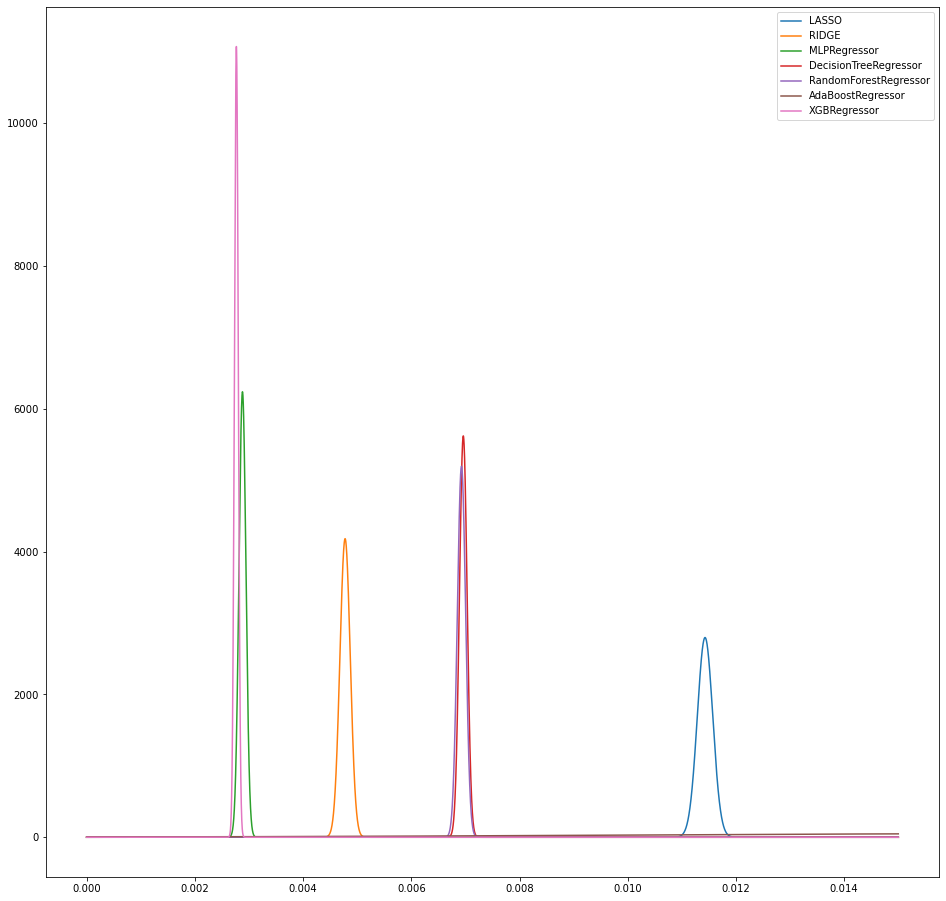

In [16]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
%matplotlib inline


##Plot respective distributions of models over k-fold cross validation
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,16))

x = np.linspace(0,0.015, 10000)
ax.plot(x, stats.norm.pdf(x, linregdists['Lasso'].mean(),  math.sqrt(linregdists['Lasso'].var())), label = 'LASSO')
ax.plot(x, stats.norm.pdf(x, linregdists['Ridge'].mean(),  math.sqrt(linregdists['Ridge'].var())), label = 'RIDGE')
ax.plot(x, stats.norm.pdf(x, MLPdists ['MLPRegressor'].mean(),  math.sqrt(MLPdists['MLPRegressor'].var())), label = 'MLPRegressor')
ax.plot(x, stats.norm.pdf(x, decisiontreedists ['DecisionTreeRegressor'].mean(),  math.sqrt(decisiontreedists['DecisionTreeRegressor'].var())), label = 'DecisionTreeRegressor')
ax.plot(x, stats.norm.pdf(x, ensembledists ['RandomForestRegressor'].mean(),  math.sqrt(ensembledists['RandomForestRegressor'].var())), label = 'RandomForestRegressor')
ax.plot(x, stats.norm.pdf(x, ensembledists ['AdaBoostRegressor'].mean(),  math.sqrt(ensembledists['AdaBoostRegressor'].var())), label = 'AdaBoostRegressor')
ax.plot(x, stats.norm.pdf(x, ensembledists ['XGBRegressor'].mean(),  math.sqrt(ensembledists['XGBRegressor'].var())), label = 'XGBRegressor')

ax.legend()